In [3]:
import numpy as np
import os
from PIL import Image
import torch
from torch.autograd import Variable
from SSD.data import BaseTransform,VOC_CLASSES as mapping
from SSD.ssd import build_ssd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torchvision'

In [121]:
model=build_ssd('test')
model.load_state_dict(torch.load("SSD/ssd300_mAP_77.43_v2.pth",map_location=lambda storage,loc:storage))
transform=BaseTransform(model.size,(104/256.0,117/256.0,123/256.0))

C:\Users\Dell\Desktop\Illegal_Parking\SSD\ssd.py:33: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.priors = Variable(self.priorbox.forward(), volatile=True)
C:\Users\Dell\Desktop\Illegal_Parking\SSD\layers\modules\l2norm.py:17: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(self.weight,self.gamma)


In [128]:
def detect(frame , net , trans):
    height,width=frame.shape[:2]
    frame_t=trans(frame)[0]
    x=torch.from_numpy(frame_t).permute(2,0,1)      #rbg to grb
    x=Variable(x.unsqueeze(0))
    y=net(x)
    detectioins=y.data    #[batch,class,num_class,(score,x0,y0,x1,y1)]
    scale=torch.Tensor([width,height,width,height])
    i=7  #for cars
    num=0
    coor=[]
    while detectioins[0,i,num,]>=0.6 and mapping[i-1]=="car":
        points=detectioins[0,i,num,1:]
        points=points*scale
        points=points.numpy()
        cv2.rectangle(frame,(int(points[0]),int(points[1])),(int(points[2]),int(points[3])),(0,255,0),2)
#             cv2.putText(frame,mapping[i-1],(int(points[0]),int(points[1])),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),2,cv2.LINE_AA)
        num+=1
        coor.append(points)
    return frame,num,sorted(coor,key=lambda x : x[0])

(<matplotlib.image.AxesImage at 0x27080a0c630>,
 5,
 [array([  7.271912, 105.844765,  72.499855, 150.34058 ], dtype=float32),
  array([ 94.878075, 105.61644 , 303.75812 , 281.73334 ], dtype=float32),
  array([247.84608, 163.85541, 651.69946, 411.03482], dtype=float32),
  array([260.79532, 101.6869 , 362.00476, 165.02954], dtype=float32),
  array([294.46457, 153.30849, 634.0794 , 281.2546 ], dtype=float32)])

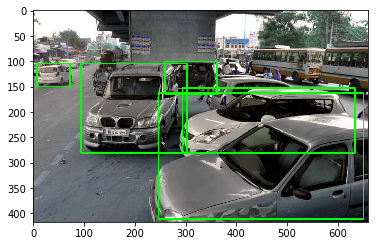

In [129]:
img=cv2.imread("./SSD/test.jpg")
frame,num,coor=detect(img,model,transform)
plt.imshow(frame),num , coor

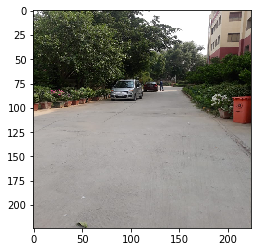

In [124]:
img=Image.open("./Data/images/IMG-20190708-WA0000.jpg")
img=img.resize((224,224))
img=np.array(img)
plt.imshow(img)

In [126]:
labels=[]
count=0
for i in os.listdir("./Data/images/"):
    count+=1
    print(count,end=" ")
    img=Image.open("./Data/images/"+i)
    img=img.resize((224,224))
    img=np.array(img)
    frame,num,coor=detect(img,model,transform)
#     plt.imshow(frame)
#     m=input()
    labels.append([i,num,coor,[0]*num])

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 

In [127]:
labels

[['IMG-20190708-WA0000.jpg',
  1,
  [array([ 79.79666,  70.36965, 112.98849,  93.75379], dtype=float32)],
  [0]],
 ['IMG-20190708-WA0001.jpg',
  1,
  [array([ 74.28795 ,  60.615673, 152.8952  , 112.63849 ], dtype=float32)],
  [0]],
 ['IMG-20190708-WA0002.jpg',
  2,
  [array([ 10.023691,  40.63152 , 119.167854, 111.11149 ], dtype=float32),
   array([115.88924 ,  47.62655 , 166.64946 ,  78.252716], dtype=float32)],
  [0, 0]],
 ['IMG-20190708-WA0003.jpg',
  1,
  [array([ 73.44276,  67.08486, 134.48557, 104.07268], dtype=float32)],
  [0]],
 ['IMG-20190708-WA0004.jpg',
  1,
  [array([115.3506  ,  85.271576, 188.15633 , 124.81831 ], dtype=float32)],
  [0]],
 ['IMG-20190708-WA0005.jpg',
  2,
  [array([ -0.5452328,  57.071198 ,  84.31593  , 118.04035  ], dtype=float32),
   array([ 70.0764  ,  50.369156, 220.82559 , 132.36383 ], dtype=float32)],
  [0, 0]],
 ['IMG-20190708-WA0006.jpg',
  1,
  [array([ 74.84013,  82.68138, 153.49147, 130.48189], dtype=float32)],
  [0]],
 ['IMG-20190708-WA0007.jpg

In [4]:
! pip3 install torchvision

  Using cached https://files.pythonhosted.org/packages/78/8d/b92dc9543bc51f7fcaf8d953d814770d1e471ee93c4eff19a76f9b9b510b/torchvision-0.3.0-cp36-cp36m-win_amd64.whl


  ERROR: Could not find a version that satisfies the requirement torch>=1.1.0 (from torchvision) (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2)
ERROR: No matching distribution found for torch>=1.1.0 (from torchvision)
